In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

# taget y = grade 

In [73]:
url = 'kingCountyHouseData.csv'
df = pd.read_csv(url)
# Selecting columns I am interested in

columns = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','lat','long','grade','price']

df = df.loc[:, columns].reset_index(drop=True)
df.head(10)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,lat,long,grade,price
0,3,1.00,1180,5650,1.0,47.5112,-122.257,7,221900.0
1,3,2.25,2570,7242,2.0,47.7210,-122.319,7,538000.0
2,2,1.00,770,10000,1.0,47.7379,-122.233,6,180000.0
3,4,3.00,1960,5000,1.0,47.5208,-122.393,7,604000.0
4,3,2.00,1680,8080,1.0,47.6168,-122.045,8,510000.0
5,4,4.50,5420,101930,1.0,47.6561,-122.005,11,1225000.0
6,3,2.25,1715,6819,2.0,47.3097,-122.327,7,257500.0
7,3,1.50,1060,9711,1.0,47.4095,-122.315,7,291850.0
8,3,1.00,1780,7470,1.0,47.5123,-122.337,7,229500.0
9,3,2.50,1890,6560,2.0,47.3684,-122.031,7,323000.0


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   bedrooms     21613 non-null  int64  
 1   bathrooms    21613 non-null  float64
 2   sqft_living  21613 non-null  int64  
 3   sqft_lot     21613 non-null  int64  
 4   floors       21613 non-null  float64
 5   lat          21613 non-null  float64
 6   long         21613 non-null  float64
 7   grade        21613 non-null  int64  
 8   price        21613 non-null  float64
dtypes: float64(5), int64(4)
memory usage: 1.5 MB


<Axes: title={'center': 'price'}, xlabel='grade'>

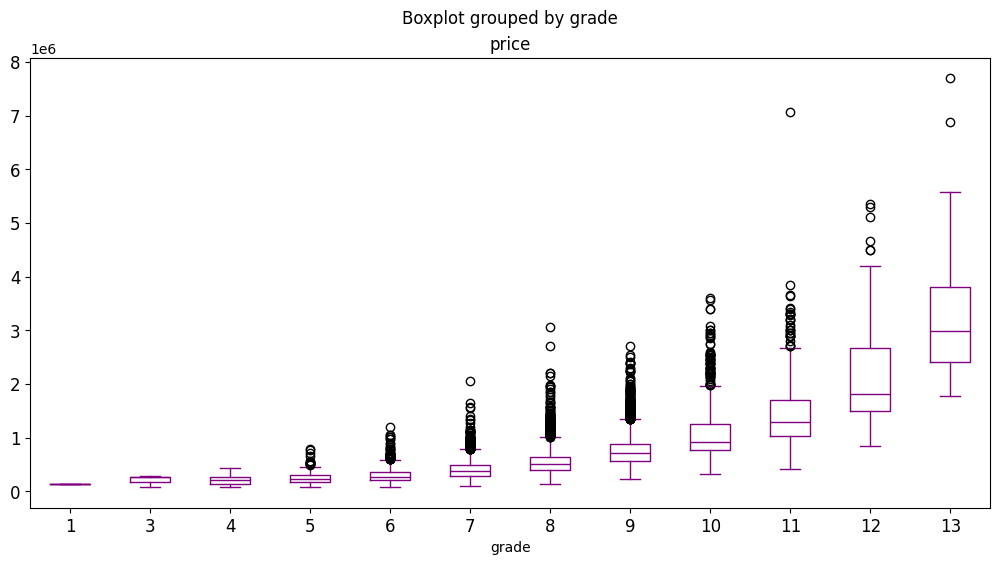

In [75]:
#display boxplot of price with grade

df.boxplot(column='price', by='grade', figsize=(12, 6),
            grid=False, color='purple', fontsize=12)

# Display all grade Class

**Note:** In this lab, the target variable (`y label`) is `grade`. We will demonstrate how to split data while observing that the distribution of `grade` in training and testing sets may differ, especially without stratification.

We will compare the distribution of `grade` between training and testing sets to check if they are similar or significantly different. This helps detect sampling bias.

In [76]:
df['grade'].value_counts().sort_index()

grade
1        1
3        3
4       29
5      242
6     2038
7     8981
8     6068
9     2615
10    1134
11     399
12      90
13      13
Name: count, dtype: int64

In [77]:
features = ['bedrooms','bathrooms','sqft_living','sqft_lot','floors','lat','long','grade','price']
X = df.loc[:, features]
y = df.loc[:, ['grade']]

In [78]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,lat,long,grade,price
0,3,1.00,1180,5650,1.0,47.5112,-122.257,7,221900.0
1,3,2.25,2570,7242,2.0,47.7210,-122.319,7,538000.0
2,2,1.00,770,10000,1.0,47.7379,-122.233,6,180000.0
3,4,3.00,1960,5000,1.0,47.5208,-122.393,7,604000.0
4,3,2.00,1680,8080,1.0,47.6168,-122.045,8,510000.0
...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,47.6993,-122.346,8,360000.0
21609,4,2.50,2310,5813,2.0,47.5107,-122.362,8,400000.0
21610,2,0.75,1020,1350,2.0,47.5944,-122.299,7,402101.0
21611,3,2.50,1600,2388,2.0,47.5345,-122.069,8,400000.0


In [79]:
y

,grade
0,7
1,7
2,6
3,7
4,8
...,...
21608,8
21609,8
21610,7
21611,8


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size = .75)


In [81]:
print(X.shape,y.shape)

(21613, 9) (21613, 1)


In [82]:
print(X_train.shape, y_train.shape)

(16209, 9) (16209, 1)


In [83]:
print(X_test.shape, y_test.shape)

(5404, 9) (5404, 1)


### Distribution Analysis of `grade` between Train and Test Sets
We will now check if the distribution of grades in the training set is similar to the testing set.

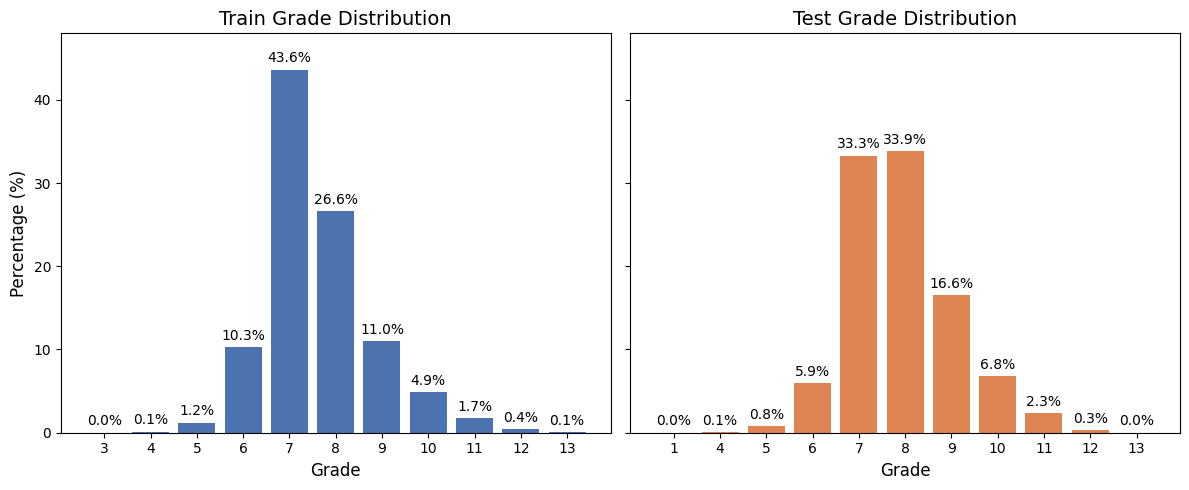

In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Assuming df already exists
X = df.drop(columns=['grade'])
y = df['grade']

# Train-test split without stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=False
)

# Calculate normalized counts
train_dist = y_train.value_counts(normalize=True).sort_index() * 100
test_dist = y_test.value_counts(normalize=True).sort_index() * 100

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

colors = ['#4C72B0'] * len(train_dist)

# Train plot
bars1 = axes[0].bar(train_dist.index.astype(str), train_dist, color=colors)
axes[0].set_title("Train Grade Distribution", fontsize=14)
axes[0].set_ylabel("Percentage (%)", fontsize=12)
axes[0].set_xlabel("Grade", fontsize=12)
axes[0].set_ylim(0, max(train_dist.max(), test_dist.max()) * 1.1)
for bar in bars1:
    height = bar.get_height()
    axes[0].annotate(f"{height:.1f}%",
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

# Test plot
bars2 = axes[1].bar(test_dist.index.astype(str), test_dist, color='#DD8452')
axes[1].set_title("Test Grade Distribution", fontsize=14)
axes[1].set_xlabel("Grade", fontsize=12)
for bar in bars2:
    height = bar.get_height()
    axes[1].annotate(f"{height:.1f}%",
                     xy=(bar.get_x() + bar.get_width() / 2, height),
                     xytext=(0, 3),
                     textcoords="offset points",
                     ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
